### Question 1 ###


Results for K=1:
Distance Metric: euclidean
Clusters: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Centroids:
[[23.94444444  7.61111111  8.61111111]]

Distance Metric: manhattan
Clusters: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Centroids:
[[23.94444444  7.61111111  8.61111111]]

Distance Metric: minkowski
Clusters: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Centroids:
[[23.94444444  7.61111111  8.61111111]]


Results for K=2:
Distance Metric: euclidean
Clusters: [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
Centroids:
[[16.          5.16666667 12.33333333]
 [27.91666667  8.83333333  6.75      ]]

Distance Metric: manhattan
Clusters: [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
Centroids:
[[27.91666667  8.83333333  6.75      ]
 [16.          5.16666667 12.33333333]]

Distance Metric: minkowski
Clusters: [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
Centroids:
[[27.91666667  8.83333333  6.75      ]
 [16.          5.16666667 12.33333333]]


Results for K=3:
Distance Metric: euclidean
Clusters: [2 2 1 1 1 2 0 0 0 0 0 0 0 2 2

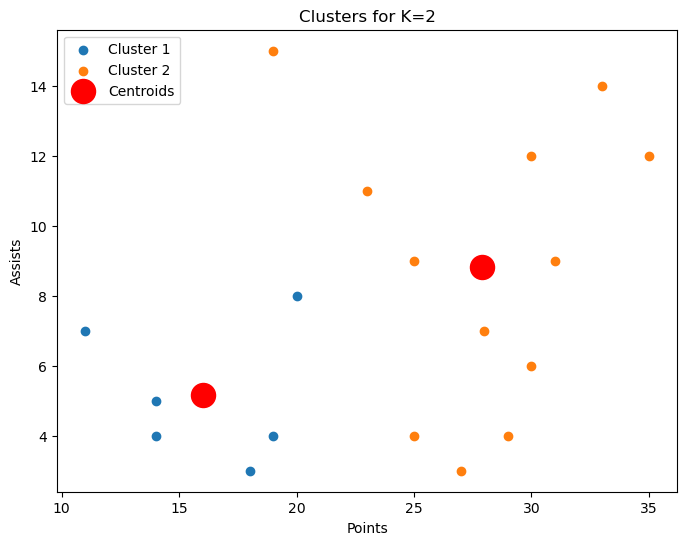

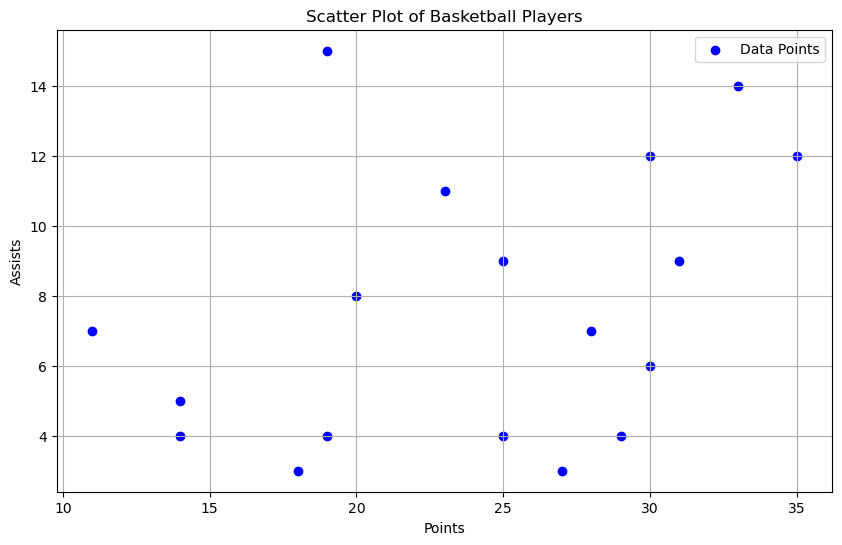

Final Centroids (Euclidean): [[27.91666667  8.83333333  6.75      ]
 [16.          5.16666667 12.33333333]]


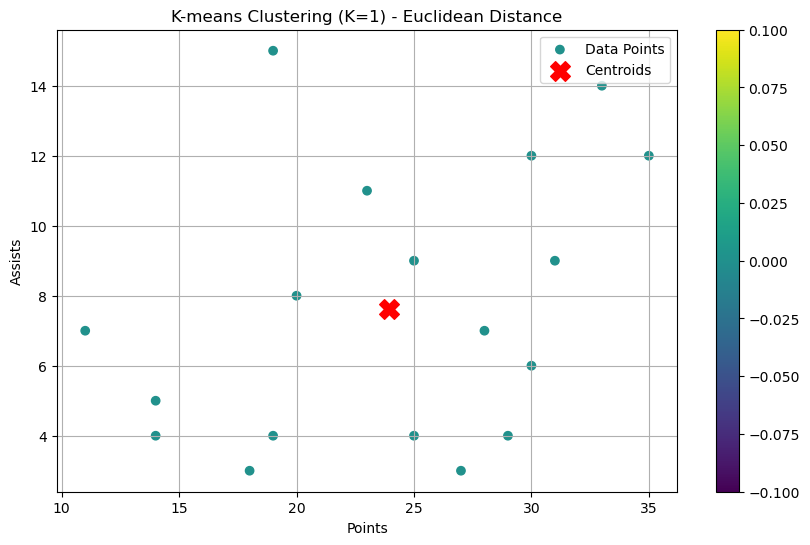

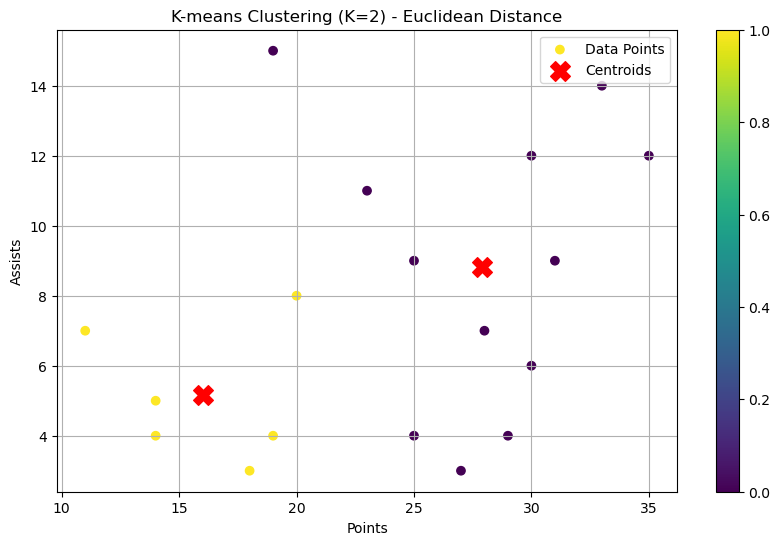

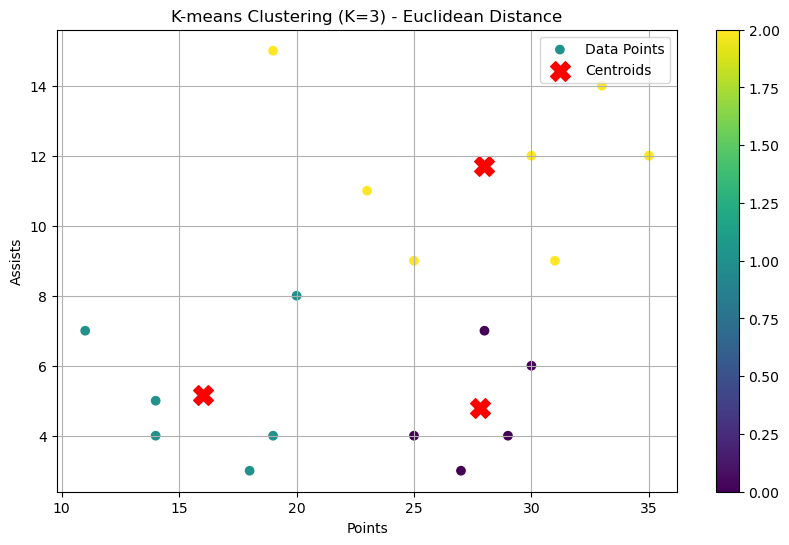

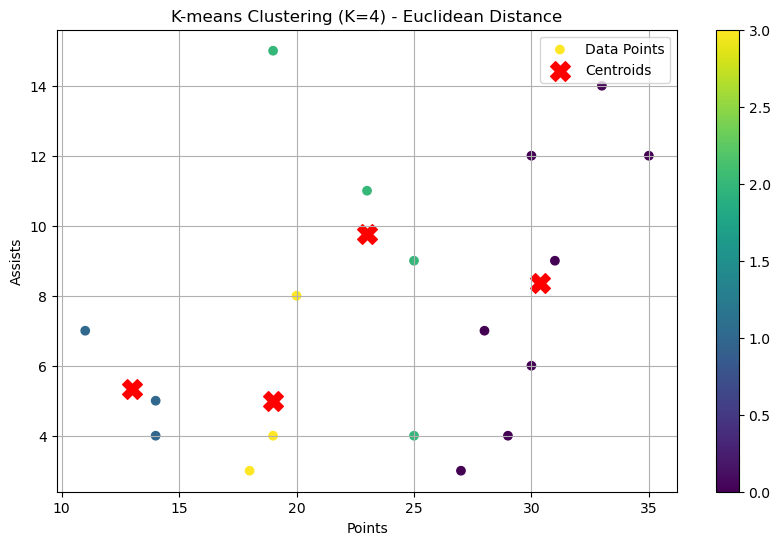

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data: Basketball Player Statistics
data = {
    'points': [18.0, 19.0, 14.0, 14.0, 11.0, 20.0, 28.0, 30.0, 31.0, 35.0,
               33.0, 25.0, 25.0, 27.0, 29.0, 30.0, 19.0, 23.0],
    'assists': [3.0, 4.0, 5.0, 4.0, 7.0, 8.0, 7.0, 6.0, 9.0, 12.0,
                14.0, 9.0, 4.0, 3.0, 4.0, 12.0, 15.0, 11.0],
    'rebounds': [15, 14, 10, 8, 14, 13, 9, 5, 4, 11,
                 6, 5, 3, 8, 12, 7, 6, 5]
}

df = pd.DataFrame(data)

# Distance Functions
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):
    return (np.sum(np.abs(a - b) ** p)) ** (1 / p)


# K-means algorithm
def kmeans(data, k, distance_metric='euclidean', max_iterations=100):
    centroids = data.sample(n=k).to_numpy()  # Randomly initialize centroids
    for _ in range(max_iterations):
        # Calculate distances
        if distance_metric == 'euclidean':
            distances = np.linalg.norm(data.to_numpy()[:, None] - centroids, axis=2)
        elif distance_metric == 'manhattan':
            distances = np.abs(data.to_numpy()[:, None] - centroids).sum(axis=2)
        elif distance_metric == 'minkowski':
            distances = np.power(np.sum(np.power(np.abs(data.to_numpy()[:, None] - centroids), 3), axis=2), 1/3)

        clusters = np.argmin(distances, axis=1)  # Assign clusters based on nearest centroid
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        
        if np.array_equal(new_centroids, centroids):  # Check for convergence
            break
        
        centroids = new_centroids
    return clusters, centroids

# Running K-means for K=1, 2, 3, 4 using different distance metrics
results = {}
for k in range(1, 5):
    results[k] = {
        'euclidean': kmeans(df, k, distance_metric='euclidean'),
        'manhattan': kmeans(df, k, distance_metric='manhattan'),
        'minkowski': kmeans(df, k, distance_metric='minkowski')
    }

# Display the results for each K
for k, metrics in results.items():
    print(f"\nResults for K={k}:")
    for metric, (clusters, centroids) in metrics.items():
        print(f"Distance Metric: {metric}")
        print(f"Clusters: {clusters}")
        print(f"Centroids:\n{centroids}\n")

# Optionally, plot the clusters for a specific K
def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(data['points'][clusters == i], data['assists'][clusters == i], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
    plt.title(f'Clusters for K={k}')
    plt.xlabel('Points')
    plt.ylabel('Assists')
    plt.legend()
    plt.show()

# Example: Plotting for K=2 with Euclidean distance
k = 2
clusters, centroids = results[k]['euclidean']
plot_clusters(df, clusters, centroids, k)


# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['points'], df['assists'], c='blue', label='Data Points')
plt.title('Scatter Plot of Basketball Players')
plt.xlabel('Points')
plt.ylabel('Assists')
plt.legend()
plt.grid()
plt.show()

# Print final centroids
print("Final Centroids (Euclidean):", centroids_euclidean)


# Plotting function for clusters
def plot_clusters(df, k, distance_metric='euclidean'):
    clusters, centroids = kmeans(df, k, distance_metric)
    df['cluster'] = clusters
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['points'], df['assists'], c=df['cluster'], cmap='viridis', label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-means Clustering (K={k}) - {distance_metric.capitalize()} Distance')
    plt.xlabel('Points')
    plt.ylabel('Assists')
    plt.legend()
    plt.grid()
    plt.colorbar(scatter)
    plt.show()

# Plot for K=1, K=2, K=3, K=4
for k in range(1, 5):
    plot_clusters(df, k, distance_metric='euclidean')


   K          SSE
0  1  16068.50000
1  2   6644.00000
2  3   5659.70873
3  4   3369.00000


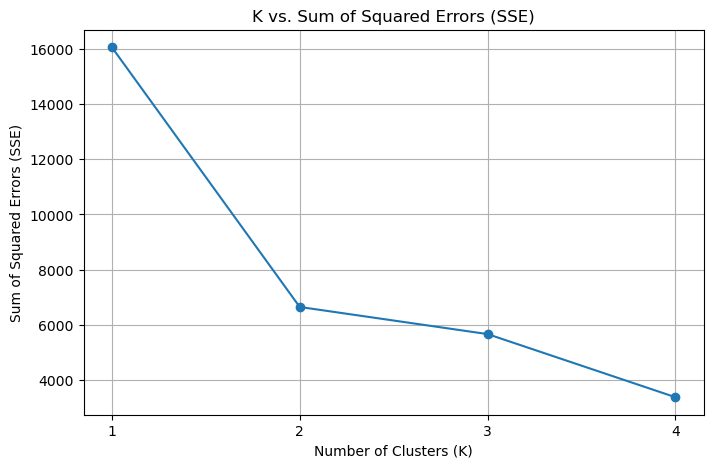

In [13]:
# K-means Function with SSE
def kmeans_with_sse(df, k, iterations=10):
    centroids = df.sample(n=k).to_numpy()
    sse_list = []
    
    for _ in range(iterations):
        clusters = []
        for index, row in df.iterrows():
            distances = [euclidean_distance(row.to_numpy(), centroid) for centroid in centroids]
            clusters.append(np.argmin(distances))
        
        # Calculate SSE
        sse = 0
        for cluster in range(k):
            cluster_points = df[np.array(clusters) == cluster]
            for point in cluster_points.values:
                sse += euclidean_distance(point, centroids[cluster]) ** 2
        sse_list.append(sse)
        
        # Update centroids
        new_centroids = []
        for cluster in range(k):
            cluster_points = df[np.array(clusters) == cluster]
            new_centroids.append(cluster_points.mean().to_numpy())
        
        centroids = np.array(new_centroids)
    
    return clusters, centroids, sse_list

# Compute SSE for K=1 to K=4
sse_values = []
for k in range(1, 5):
    clusters, centroids, sse_list = kmeans_with_sse(df, k)
    total_sse = sum(sse_list)
    sse_values.append(total_sse)

# Create a DataFrame for SSE values
sse_df = pd.DataFrame({
    'K': range(1, 5),
    'SSE': sse_values
})

# Print SSE Table
print(sse_df)

# Plotting K vs SSE
plt.figure(figsize=(8, 5))
plt.plot(sse_df['K'], sse_df['SSE'], marker='o')
plt.title('K vs. Sum of Squared Errors (SSE)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(sse_df['K'])
plt.grid()
plt.show()


    K           SSE
0   1  14016.500000
1   2   6682.000000
2   3   4989.402173
3   4   4670.928571
4   5   2677.740000
5   6   2626.285714
6   7   1627.000000
7   8   1399.240000
8   9   1878.500000
9  10   1047.500000


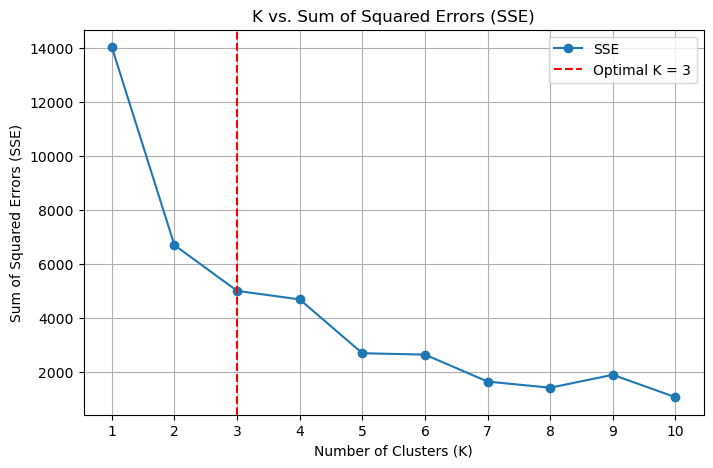

In [14]:
# Compute SSE for K=1 to K=10 (to find the elbow point)
sse_values = []
for k in range(1, 11):
    clusters, centroids, sse_list = kmeans_with_sse(df, k)
    total_sse = sum(sse_list)
    sse_values.append(total_sse)

# Create a DataFrame for SSE values
sse_df = pd.DataFrame({
    'K': range(1, 11),
    'SSE': sse_values
})

# Identify the optimal K (Elbow Method)
optimal_k = 3  # Adjust this based on visual inspection of the SSE plot

# Print SSE Table
print(sse_df)

# Plotting K vs SSE with optimal K marked
plt.figure(figsize=(8, 5))
plt.plot(sse_df['K'], sse_df['SSE'], marker='o', label='SSE')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.title('K vs. Sum of Squared Errors (SSE)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(sse_df['K'])
plt.grid()
plt.legend()
plt.show()


### Question 2 ###

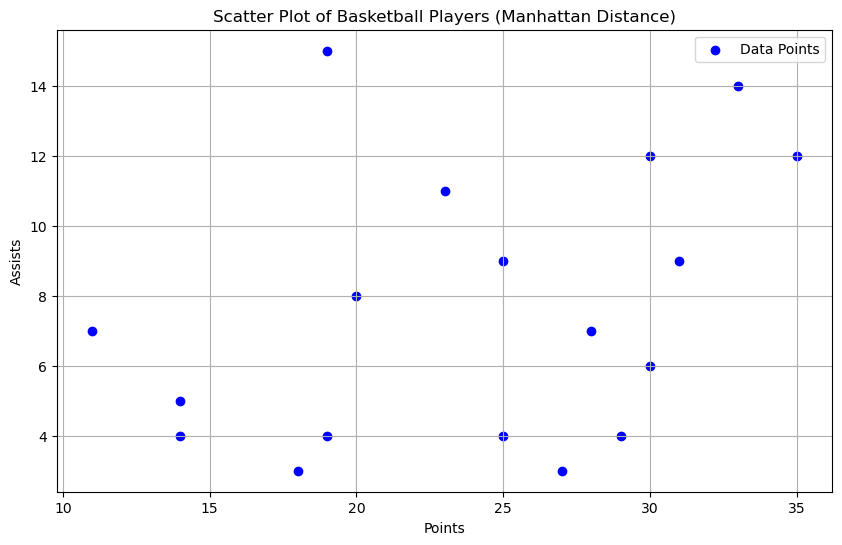

    K           SSE
0   1  37018.388889
1   2  23850.237843
2   3  14085.665591
3   4  13642.173554
4   5   9941.020000
5   6   5518.010000
6   7   5908.388889
7   8   4913.000000
8   9   3011.500000
9  10   1858.500000


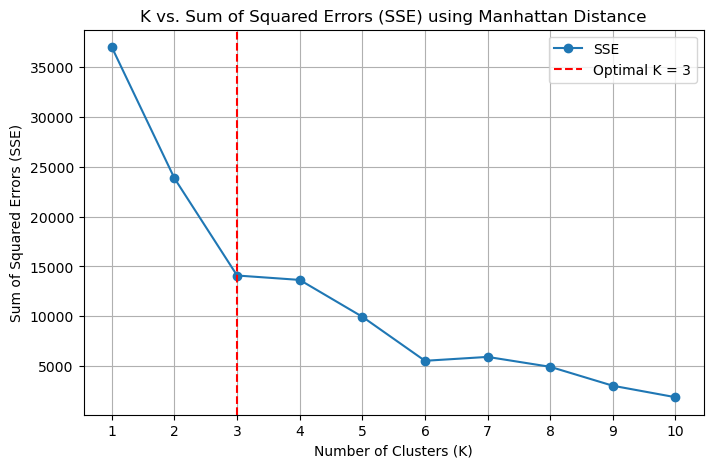

In [16]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['points'], df['assists'], c='blue', label='Data Points')
plt.title('Scatter Plot of Basketball Players (Manhattan Distance)')
plt.xlabel('Points')
plt.ylabel('Assists')
plt.legend()
plt.grid()
plt.show()
# Manhattan Distance Function
def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

# K-means Function with SSE Using Manhattan Distance
def kmeans_with_sse(df, k, iterations=10):
    centroids = df.sample(n=k).to_numpy()
    sse_list = []
    
    for _ in range(iterations):
        clusters = []
        for index, row in df.iterrows():
            distances = [manhattan_distance(row.to_numpy(), centroid) for centroid in centroids]
            clusters.append(np.argmin(distances))
        
        # Calculate SSE
        sse = 0
        for cluster in range(k):
            cluster_points = df[np.array(clusters) == cluster]
            for point in cluster_points.values:
                sse += manhattan_distance(point, centroids[cluster]) ** 2
        sse_list.append(sse)
        
        # Update centroids
        new_centroids = []
        for cluster in range(k):
            cluster_points = df[np.array(clusters) == cluster]
            new_centroids.append(cluster_points.mean().to_numpy())
        
        centroids = np.array(new_centroids)
    
    return clusters, centroids, sse_list

# Compute SSE for K=1 to K=10
sse_values = []
for k in range(1, 11):
    clusters, centroids, sse_list = kmeans_with_sse(df, k)
    total_sse = sum(sse_list)
    sse_values.append(total_sse)

# Create a DataFrame for SSE values
sse_df = pd.DataFrame({
    'K': range(1, 11),
    'SSE': sse_values
})

# Identify the optimal K (Elbow Method)
optimal_k = 3  # Adjust based on visual inspection of the SSE plot

# Print SSE Table
print(sse_df)

# Plotting K vs SSE with optimal K marked
plt.figure(figsize=(8, 5))
plt.plot(sse_df['K'], sse_df['SSE'], marker='o', label='SSE')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.title('K vs. Sum of Squared Errors (SSE) using Manhattan Distance')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(sse_df['K'])
plt.grid()
plt.legend()
plt.show()

### Question 3 ###

    K           SSE
0   1  11626.632167
1   2   4959.510958
2   3   3972.740945
3   4   2707.207784
4   5   3131.230235
5   6   2050.357540
6   7   2034.749988
7   8   1416.794933
8   9   1246.496315
9  10    785.333052


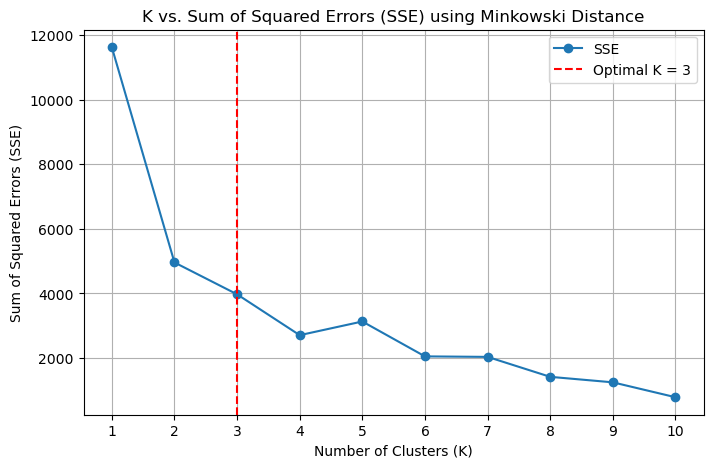

In [19]:
# Minkowski Distance Function
def minkowski_distance(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1/p)

# K-means Function with SSE Using Minkowski Distance
def kmeans_with_sse(df, k, iterations=10, p=3):
    centroids = df.sample(n=k).to_numpy()
    sse_list = []
    
    for _ in range(iterations):
        clusters = []
        for index, row in df.iterrows():
            distances = [minkowski_distance(row.to_numpy(), centroid, p) for centroid in centroids]
            clusters.append(np.argmin(distances))
        
        # Calculate SSE
        sse = 0
        for cluster in range(k):
            cluster_points = df[np.array(clusters) == cluster]
            for point in cluster_points.values:
                sse += minkowski_distance(point, centroids[cluster], p) ** 2
        sse_list.append(sse)
        
        # Update centroids
        new_centroids = []
        for cluster in range(k):
            cluster_points = df[np.array(clusters) == cluster]
            new_centroids.append(cluster_points.mean().to_numpy())
        
        centroids = np.array(new_centroids)
    
    return clusters, centroids, sse_list

# Compute SSE for K=1 to K=10
sse_values = []
for k in range(1, 11):
    clusters, centroids, sse_list = kmeans_with_sse(df, k)
    total_sse = sum(sse_list)
    sse_values.append(total_sse)

# Create a DataFrame for SSE values
sse_df = pd.DataFrame({
    'K': range(1, 11),
    'SSE': sse_values
})

# Identify the optimal K (Elbow Method)
optimal_k = 3  # Adjust based on visual inspection of the SSE plot

# Print SSE Table
print(sse_df)

# Plotting K vs SSE with optimal K marked
plt.figure(figsize=(8, 5))
plt.plot(sse_df['K'], sse_df['SSE'], marker='o', label='SSE')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.title('K vs. Sum of Squared Errors (SSE) using Minkowski Distance')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(sse_df['K'])
plt.grid()
plt.legend()
plt.show()


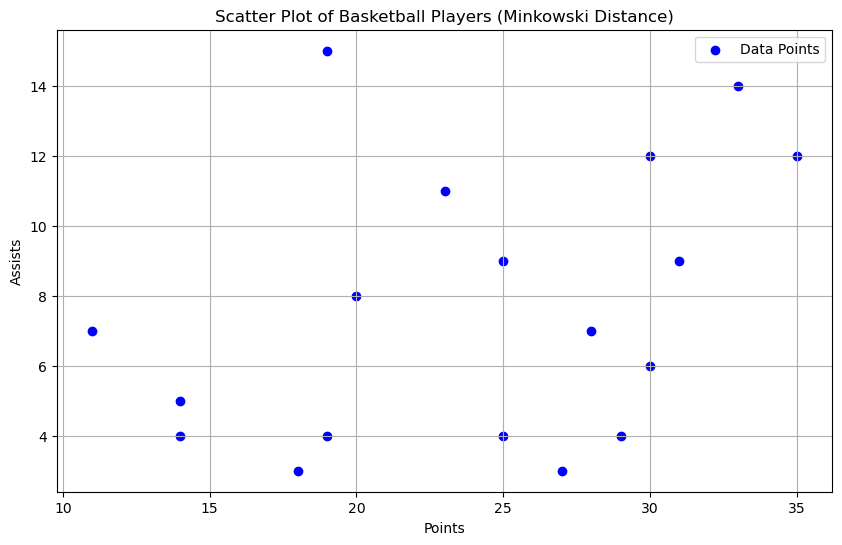

In [18]:
# Function to compute Minkowski distance (optional)
def minkowski_distance(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1/p)

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['points'], df['assists'], c='blue', label='Data Points')
plt.title('Scatter Plot of Basketball Players (Minkowski Distance)')
plt.xlabel('Points')
plt.ylabel('Assists')
plt.legend()
plt.grid()
plt.show()
